In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = data = pd.read_csv("Master.csv")
df.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,220.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


In [3]:
hw = df[["weight", "height"]]
hw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18846 entries, 0 to 18845
Data columns (total 2 columns):
weight    17975 non-null float64
height    18041 non-null float64
dtypes: float64(2)
memory usage: 294.5 KB


In [25]:
hw = hw.dropna()
hw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17918 entries, 0 to 18845
Data columns (total 2 columns):
weight    17918 non-null float64
height    17918 non-null float64
dtypes: float64(2)
memory usage: 420.0 KB


In [26]:
hw.head()

,weight,height
0,220.0,75.0
1,180.0,72.0
2,190.0,75.0
3,190.0,75.0
4,184.0,73.0


<Figure size 576x576 with 0 Axes>

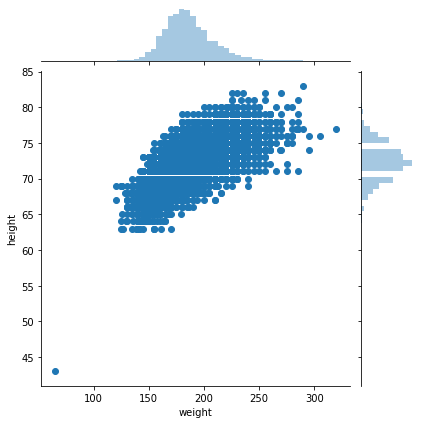

In [27]:
import seaborn as sns 
plt.figure(figsize=(8,8))
sns.jointplot(x='weight', y = 'height', data = hw)
plt.show()

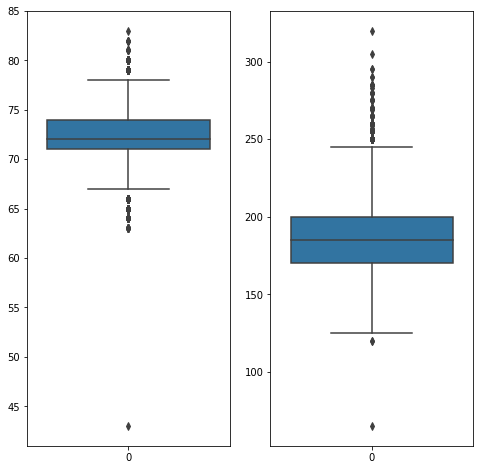

In [28]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
sns.boxplot(data = hw.height)
plt.subplot(1,2,2)
sns.boxplot(data = hw.weight)
plt.show()

In [29]:
from scipy import stats 
percentiles = np.array([25, 75])
x_h = np.percentile(hw.height, percentiles)
IQR_h = stats.iqr(hw.height)
x_h, IQR_h

(array([71., 74.]), 3.0)

In [30]:
x_w = np.percentile(hw.weight, percentiles)
IQR_w = stats.iqr(hw.weight)
x_w, IQR_w

(array([170., 200.]), 30.0)

In [31]:
x_w[1] + 1.5*IQR_w

245.0

In [32]:
hw.weight.max()

320.0

In [33]:
hw = hw[(hw.height >= (x_h[0] - 1.5*IQR_h)) & (hw.height <= (x_h[1] + 1.5*IQR_h))]
hw = hw[(hw.weight >= (x_w[0] - 1.5*IQR_w)) & (hw.weight <= (x_w[1] + 1.5*IQR_w))]
hw.shape

(17374, 2)

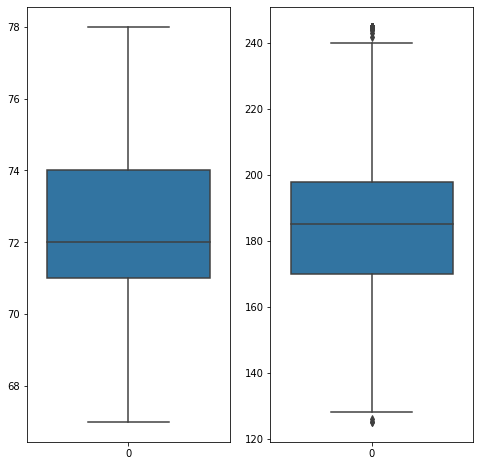

In [34]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
sns.boxplot(data = hw.height)
plt.subplot(1,2,2)
sns.boxplot(data = hw.weight)
plt.show()

In [35]:
# Homogeneity of variances
stats.levene(hw['weight'], hw['height'])

LeveneResult(statistic=21417.587436175472, pvalue=0.0)

In [36]:
# Pandas correlation: default is Pearson
hw['weight'].corr(hw['height'])

0.6708146812914383

In [37]:
# Spearman's correlation
hw['weight'].corr(hw['height'], method= 'spearman')

0.676640911865143